# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')

prices = data['MDEV']

features = data.drop('MDEV', axis = 1)

    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: 

If the 'RM' value increases, then 'MDEV' should increase as homes with more number of rooms are generally prefered. We can see an example where MDEV value increases with RM when 'LSTAT' and 'PTRATIO' are mostly constant.

6.957	3.53	19.1	621600
8.259	3.54	19.1	898800

However, there could also be a set of people that prefer smaller number of spacious rooms than larger number of small rooms. I observed one such example below where a significant increase in RM dropped the MDEV value. I observed this is not common in the dataset though.

3.863	13.33	20.2	485100
5.871	13.34	20.2	432600

If 'LSTAT' increases, 'MDEV' will drop. This is because LSTAT represents homeowners that have a greater net than the homeowners in the neighborhood. The homeowners networth also represents the the kind of home they can afford to buy. Hence if this ratio increases, it implies the value of homes in the neighbourhool is lesser than the value of homes in other neighborhoods.

We can see the same trend in the following example where RM and PTRATIO are mostly constant.

6.151	18.46	21.2	373800
6.174	24.16	21.2	294000

Another set that justifies the same

5.895	10.56	20.2	388500
5.896	24.39	20.2	174300

Here I assume PRRATIO is still within the acceptable student teacher ratio limit for public schools

If 'PTRATIO' increases this means that the student to teacher ratio is more. Parents prefer lesser student to teacher ratio and hence we would expect MDEV value to reduce if PTRATIO increases. 

5.951	17.92	16.4	451500
5.961	17.93	19.1	430500

However top schools in the district that are often in higher demand because of the scores get full faster than the schools with lower API scores and some of the tier 2 schools could have a less student to teacher ratio because of this. In these cases, its really the parents choice if they want to buy a home and would then decide the MDEV value. This would take a few years to adjust the value

6.12	9.08	21	    432600
6.144	9.09	16.9	415800


**

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict) 
        
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:
In the chapter Regression Scoring Function, it is stated that - when it comes to default regression scoring functions like R^2, "higher is better"; that is, higher scores indicate better performance. When using the error metrics described previously, we will need to overwrite this preference.

For the above data set that is considered, a R2 score of 0.92 represents 92% of the total variance has been accounted for in the linear regression model, hence the R2 score seems good.

I also referenced to a few articles on the internet and found this useful blog
http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.

R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data. It depends on the model 




**

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 2)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: 

Benefits of having training and testing subsets
-This allows us to determine the performance of the model on an independant dataset
-prevents overfitting and makes sure the model generalizes well.

Drawback
-we dont maximize the training data and we hold back some of the data set for testing. we also dont maximize testing data so the accuracy is not the best.
-it depends what kind of data is in the testing dataset. There was an example in the udacity material that showed how the learning data was mostly based on 0s and a 1 showed up in the testing and the model didnt predict the outcome accurately.

**

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

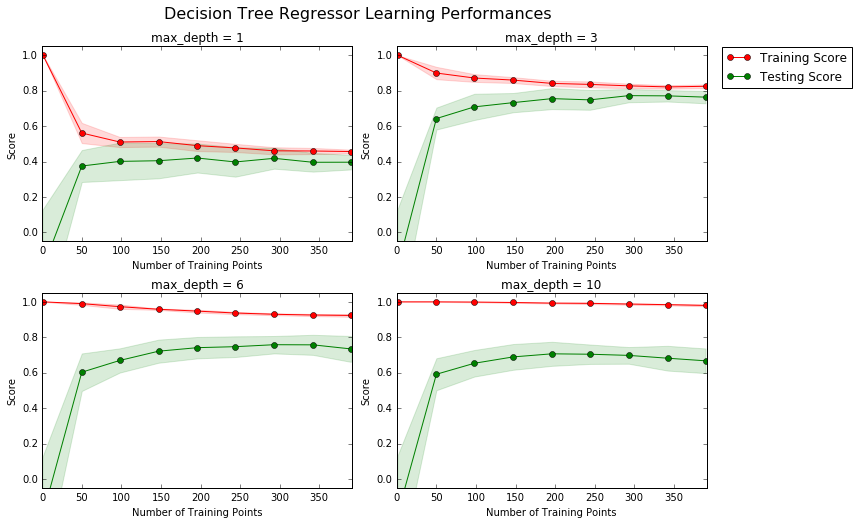

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: 

Lets choose graph #4

Here there is a large gap between the testing score and the training score and they dont seem to converge given the number of points on the graph. The maximum depth of the model is 10 and it indicates a complicated model with large variance. It would need a lot more training and testpoint points as explained in the curse of dimensionality section in the course material. As we add more training points, training score will continue to decrease and testing score will continue to rise and the two scores until they meet.

[Deepa]Adding requested information after the project review

Required:

You mentioned: "As we add more training points, training score will continue to decrease and testing score will continue to rise and the two scores until they meet."
In this statement, you stated two curves would be converged utilmatley since we adding more and more data points in the graph with max_depth 10. If you understand the overfitting concept which refers to the model too customized to the training data, so it can never do prediction well in the testing data set. Thus, two curves won't converge no matter how much data points added there. To get a converged curve, you could try to decrease the max_depth instead.

[Deepa] I revisited my learning and yes I agree that for higher model complexity, no matter how many more training points we add, the two curves will not converge. 

Please describe the trend of both training and testing curves when the training sizes increase.
Please indicate adding more additional training points would benefit the model or not? (Yes/No)
Hints:
Suggest you choose to use max_depth 3 to do discussion, as it can give much obviously visual clue.
You might look for the curves converge point and what happened afterward.
the graph had 400 training points already, do you think it still need more training points to have "significant performance improvement"?

[Deepa]

I will consider the graph with max_depth 3 as suggested. As the algorithm starts to learn, the error for the model on the training data decreases and so does the error on the test data. If we train for too long, the performance on the training dataset may continue to decrease because the model is overfitting (similar to the graph with max_depth=10). At the same time the error for the test set starts to rise again as the model’s ability to generalize decreases.

In the max_Depth=3 graph, at around 350 training points, we see that the 2 curves close to converge and beyond that they are more or less constant or even beginning to diverge. So beyond this sweet spot, increasing the training points, will not have a significance performance improvement. 

Please let me know if you need more information or if I was not clear.

**

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

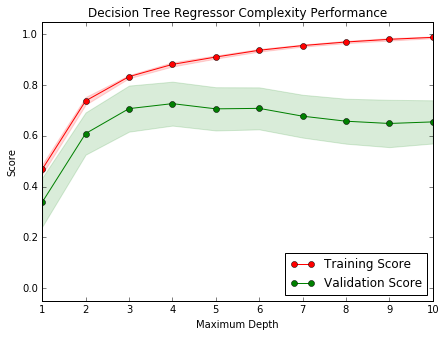

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer:

When the model is trained with a maximum depth of 1, the model suffers from high bias. We can see from the graph, that difference of the testing and the training scores at maximum depth of 1 is a minimum value and they close to converge here. 

Variance
When there is a large gap between the training and testing error this generally means the model suffers from high variance. On the graph, the difference between the testing and training scores at maximum depth = 10 is maximum and seems to be diverging.

**

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: 

The score considered here is performance_metric. Ideally the training and the testing curves need to converge on a bias/variance value (so called bias/variance tradeoff) for a given number of data points. In this case, maximum depth = 4 is the point where the two curves begin to converge as the complexity reduces resulting in high bias and begin to diverge as the complexity increases resulting in high variance.

**

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer:

GridSearchCV is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. The beauty is that it can work through many combinations in only a couple extra lines of code

**

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: 

In k-fold cross-validation, the training set is split into k smaller sets and a model is trained using k-1 of the folds as training data. The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small.


Without k-fold cross validation on grid search, it is hard to estimate a generalization performance and can lead to overfitting. 

**

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn import grid_search
from sklearn import cross_validation

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True)

    # TODO: Create the grid search object
    grid = grid_search.GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets, verbose=0)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: 

The result matches the expected intuitive answer 

**

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [13]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

print reg.predict(client_data)

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print i, price
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

[ 346500.          236478.26086957  976800.        ]
0 346500.0
Predicted selling price for Client 1's home: $346,500.00
1 236478.26087
Predicted selling price for Client 2's home: $236,478.26
2 976800.0
Predicted selling price for Client 3's home: $976,800.00


**Answer: 

The predicted selling price for client 1,2,3 seem very reasonable.

Like we expected, client 1 has a RM value and LSTAT that is in between client 2 and 3. Also client 1 has a PTRATIO value that is in between client 2 and 3 and the PTRATIO and the RM value puts the selling price for client 1 greater than client 2 but less than client 3. Client 2's selling price is on the lower side, due to low RM value, high LSTAT and high student-teacher ratio. Client 3 has the lowest LSTAT value indicating his home is close to the maximum value of the statistical results obtained below. Client 1 and 2 have their homes priced around the mean however within 2*std dev values.

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13

**

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [14]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $302,400.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer:

It would be more realistic to use recent data (over the past couple of years or so) to model the real estate housing scenario. Data collected in 1978 captures some fundamental human desires like RM and PTRATIO that doesnt change with time. PTRATIO also needs tweaking to account for the current API scores of the district and how sought after they area. LSTAT value needs to reflect the economic condition of the place in the recent times, whether there is a depression or inflation or a technological boom. Often LSTAT is key in deciding the selling price as it usually implies who can afford buying a home in that market. In a seller's market it is mostly the LSTAT that decides the price as it depends on how much money people can put in to outbid other buyers. "Bidding" could be considered as another feaure that is the extra money that the buyers put if there are multiple bidders for the home and if the selling price models that or not. Sq footage of the home is another key factor for families especially with school going kids

The features that are considered in collecting Boston City data may not be applicable to a rural city. Especilly features like NOX, DIS and LSTAT. Features need to be identified that greatly influence the rural city's dwelling and data must be collected appropriately to accurately predict prices for the rural city.

The fit_model also yield a range of 118000 which is very high considering the house price itself was not very high (in the ~300-400k range). Hence there is a need for a better model that reduces this range over a few trials.

**